In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [ ]:
# import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Read data
df = pd.read_csv("df.csv")
df

,index,A,B,C,D,E,F,G,H,I,type
0,0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.00,0.00,2
1,1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.00,0.00,1
2,2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.00,0.00,0
3,3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.00,0.05,0
4,4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...
209,209,1.67,17.83,2.86,3.91,98.36,1.14,15.62,0.00,0.00,5
210,210,1.68,13.22,0.00,1.42,102.31,0.00,23.94,0.00,0.00,1
211,211,1.67,16.64,0.00,4.83,102.52,0.21,15.06,1.38,0.02,5
212,212,1.67,16.06,0.00,2.66,101.15,0.50,20.00,0.00,0.00,3


In [ ]:
# Number of rows
n_rows = df.shape[0]
n_rows

214

In [ ]:
# Column names
column_names = df.columns.tolist()
column_names

['index', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'type']

In [ ]:
# Dimensions
dimensions = df.shape
dimensions

(214, 11)

In [ ]:
# Describle your datas
df.describe()

,index,A,B,C,D,E,F,G,H,I,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,106.500000,1.670467,16.089626,3.489813,2.745140,101.711215,0.745748,14.330888,0.297710,0.102757,1.542056
std,61.920648,0.003324,0.979979,1.875170,0.948929,1.084305,0.978743,2.276731,0.845669,0.175548,1.707648
min,0.000000,1.660000,12.880000,0.000000,0.550000,97.730000,0.000000,8.690000,0.000000,0.000000,0.000000
25%,53.250000,1.670000,15.490000,2.752500,2.260000,101.190000,0.185000,13.180000,0.000000,0.000000,0.000000
50%,106.500000,1.670000,15.960000,4.520000,2.580000,101.910000,0.830000,13.760000,0.000000,0.000000,1.000000
75%,159.750000,1.670000,16.592500,4.680000,3.100000,102.325000,0.920000,14.677500,0.000000,0.180000,2.000000
max,213.000000,1.690000,20.860000,5.840000,6.650000,105.570000,9.320000,25.900000,5.360000,0.920000,5.000000


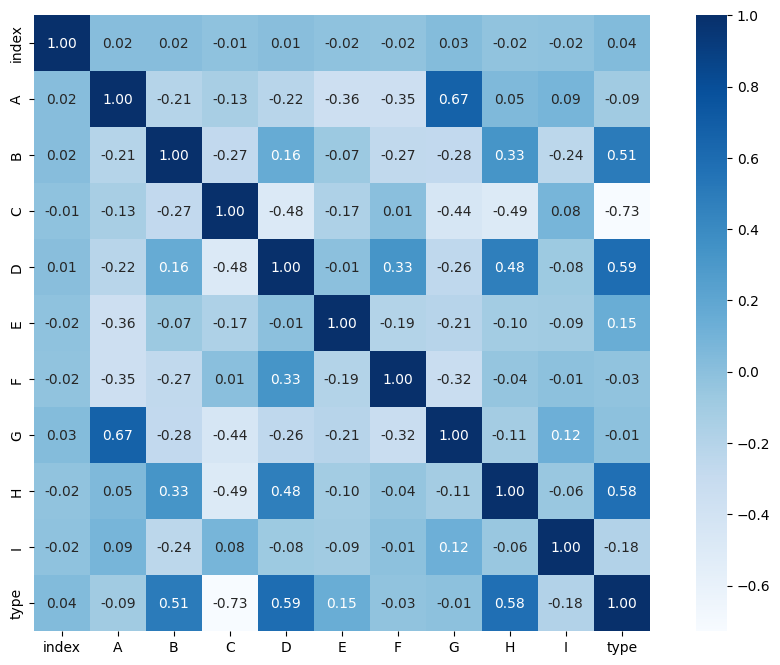

In [ ]:
# Calculate the correlation matrix

corr_matriz = df.corr()
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(corr_matriz, annot=True, fmt=".2f", cmap='Blues', square=True)
plt.show()

It's my turn to create my heat map.

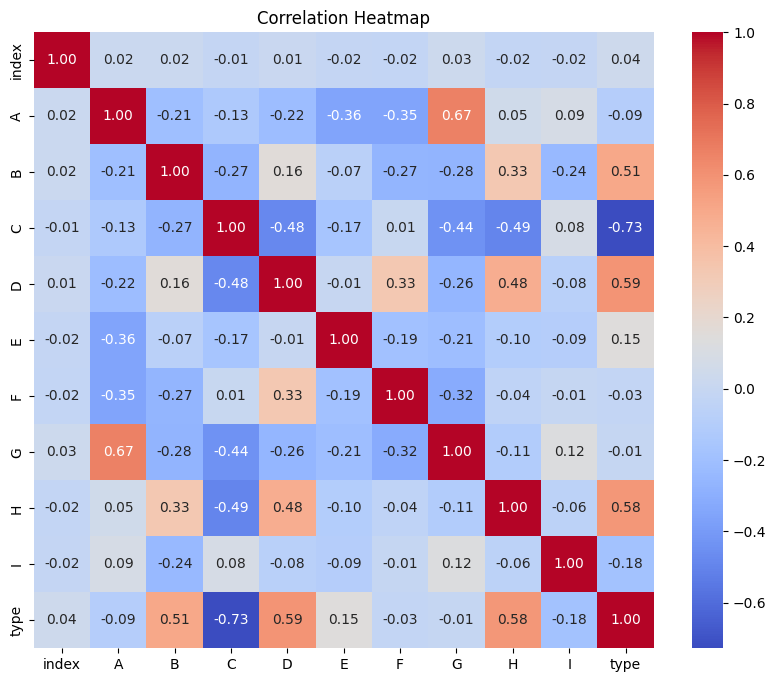

In [ ]:
# Drop the 'index' column
df.drop('index', axis=1)

,A,B,C,D,E,F,G,H,I,type
0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.00,0.00,2
1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.00,0.00,1
2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.00,0.00,0
3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.00,0.05,0
4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...
209,1.67,17.83,2.86,3.91,98.36,1.14,15.62,0.00,0.00,5
210,1.68,13.22,0.00,1.42,102.31,0.00,23.94,0.00,0.00,1
211,1.67,16.64,0.00,4.83,102.52,0.21,15.06,1.38,0.02,5
212,1.67,16.06,0.00,2.66,101.15,0.50,20.00,0.00,0.00,3


In [ ]:
# Training and test data split (70:30)
from sklearn.model_selection import train_test_split

X = df.drop('type', axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=20,
    stratify=y
)

**Gráfico de pizza - Pie**
1. Visualizar a distribuição das classes

*    O gráfico de pizza mostra como os dados estão divididos entre as diferentes classes.
*    Você vê de forma rápida qual classe tem mais exemplos e qual tem menos.

2. Detectar desequilíbrio de classes

*    Um problema comum em Machine Learning é o desbalanceamento — quando uma classe tem muito mais exemplos que outra.
*    O gráfico deixa esse problema evidente, o que ajuda a decidir se é necessário aplicar técnicas de balanceamento (como oversampling, undersampling, geração de dados sintéticos).

3. Comunicar resultados facilmente

*    Visualizações como pizza são intuitivas para apresentar para pessoas que não são técnicas.
*    Ajuda no storytelling dos seus dados e do seu modelo.

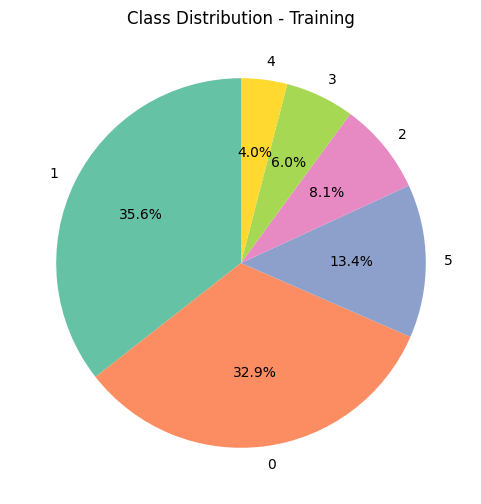

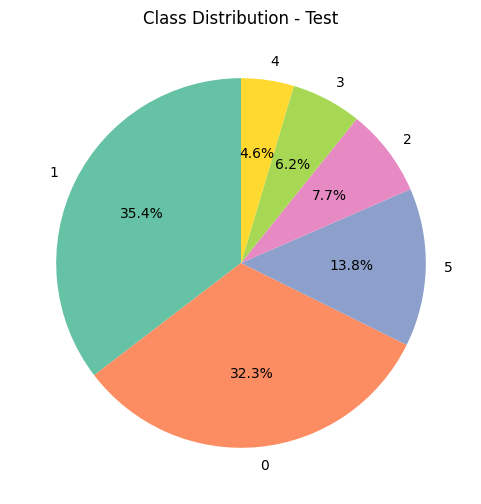

In [ ]:
# Display class distribution in training and test data

# Distribution in training
train_counts = y_train.value_counts()

plt.figure(figsize=(6,6))
plt.pie(train_counts, labels=train_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Class Distribution - Training")
plt.show()

# Distribution in test
test_counts = y_test.value_counts()

plt.figure(figsize=(6,6))
plt.pie(test_counts, labels=test_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Class Distribution - Test")
plt.show()

Now it's my turn to create a pie chart with my class distribution data.

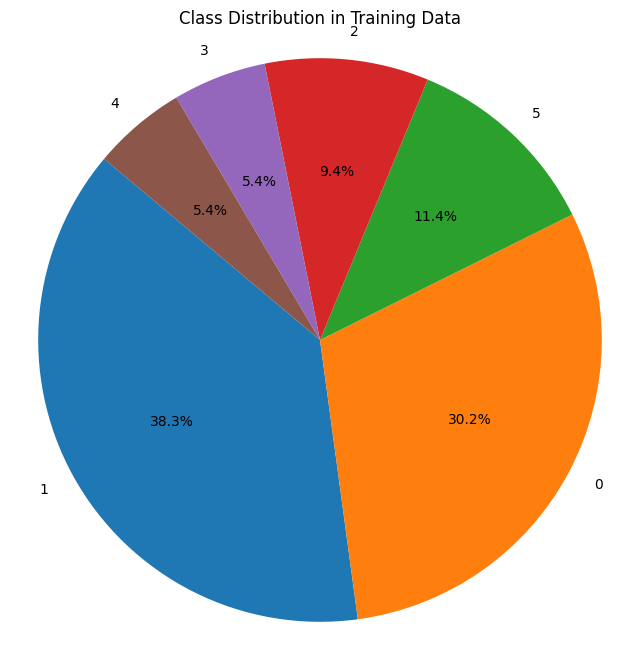

**Multinomial Logistic Regression**

Quando o problema tem mais de duas classes (ex: classificar um carro em sedan, SUV, hatch, pickup), usamos a multinomial logistic regression.

Usa a função *softmax* em vez da sigmoide (usada na logistic regression basic).

O softmax gera uma probabilidade para cada classe, e a soma delas = 1.
(A sigmoide muda para valores de 0 ou 1)

A classe com a maior probabilidade é escolhida.

---

parametro *solver*:

Define o algoritmo que o modelo vai usar para encontrar os melhores coeficientes (os parâmetros da regressão) durante o treinamento.
É o método numérico que **resolve o problema de otimização** da regressão logística para minimizar a função de custo (encontrar os coeficientes)

In [ ]:
# Multinomial logistic regression model
# Training the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)

---
**MinMaxScaler**

Escala os dados para que todos os valores fiquem dentro de um intervalo definido, geralmente entre 0 e 1 (pode ser outro intervalo, mas o padrão é esse).

*    Quando você quer que os dados fiquem em uma escala fixa e limitada (por exemplo, redes neurais geralmente preferem isso).
*    Quando as features têm diferentes escalas e você quer trazer todas para o mesmo intervalo sem alterar a forma da distribuição.

*Impacto:*

*    Não altera a forma da distribuição dos dados (não centraliza nem normaliza).
*    Apenas "comprime" os dados para um intervalo entre 0 e 1.
---

**StandardScaler**

Centraliza os dados na média 0 e escala para que tenham desvio padrão 1 — transforma os dados para terem uma distribuição com média 0 e variância 1 (chamado de padronização ou normalização z-score).

*    Quando a maioria dos algoritmos assume que os dados estão distribuídos aproximadamente de forma normal (Gaussiana).
*    Algoritmos que dependem da distância (como KNN, SVM, regressão logística) se beneficiam dessa padronização.

*Impacto:*
*    Transforma os dados para terem média zero e desvio padrão 1.
*    Pode "alterar" a escala original de forma mais significativa que o MinMaxScaler.


In [ ]:
# Scale the data

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import confusion_matrix
# Prediction on the training data

y_train_pred = model.predict(X_train_scaled)

accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy)

cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion matrix on training data:")
print(cm_train)

Accuracy on training data: 0.7315436241610739
Confusion matrix on training data:
[[37 12  0  0  0  0]
 [13 38  0  0  2  0]
 [ 8  3  1  0  0  0]
 [ 0  1  0  8  0  0]
 [ 0  0  0  0  6  0]
 [ 0  1  0  0  0 19]]


In [ ]:
# Prediction on the test data
y_test_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test data:", accuracy)

cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix on test data:")
print(cm_test)

Accuracy on test data: 0.6461538461538462
Confusion matrix on test data:
[[11  9  1  0  0  0]
 [ 3 20  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  2  0  2]
 [ 1  0  0  0  2  0]
 [ 0  1  0  0  1  7]]


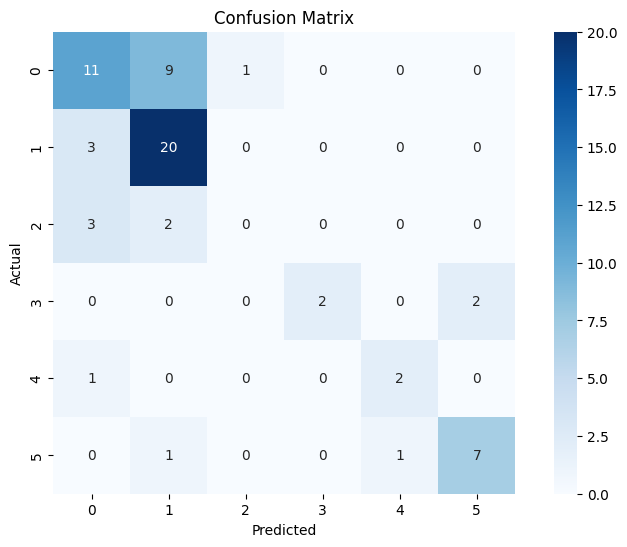

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.52      0.56        21
           1       0.62      0.87      0.73        23
           2       0.00      0.00      0.00         5
           3       1.00      0.50      0.67         4
           4       0.67      0.67      0.67         3
           5       0.78      0.78      0.78         9

    accuracy                           0.65        65
   macro avg       0.61      0.56      0.57        65
weighted avg       0.62      0.65      0.62        65



In [ ]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='Blues', square=True,
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# from sklearn.metrics import classification_report
# report = classification_report(y_test, y_test_pred)
# print("Classification Report:\n", report)

It's my turn to create my confusion matrix.

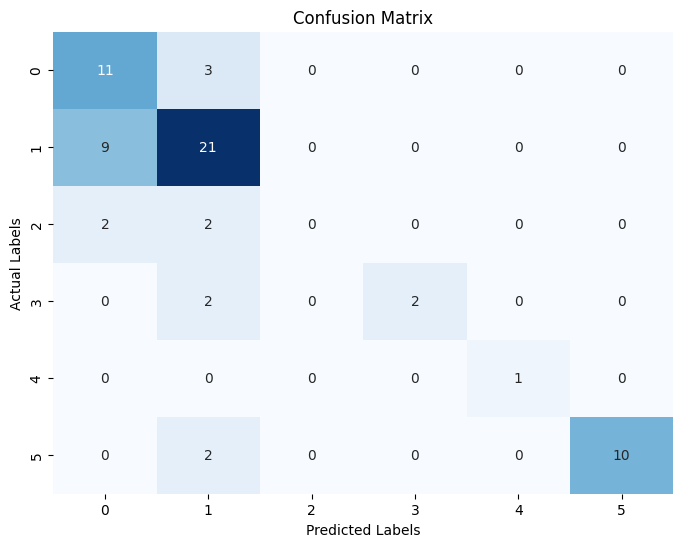